# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Machine Learning for Regression<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder in doing Machine Learning in Python employing models such as Ridge Regression, LASSO Regression, Elastic Net, and Random Forest Regressor.

#### <font face = 'Times New Roman' color = '#B5E5CF'> Name of Business Analyst: Jenny Rose Montille<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Date of Accomplishment: November 11, 2025<font/>

# <font face = 'Palatino Linotype' color = '#5885AF'> Business Understanding:<font/>

The organization seeks to understand and predict the financial health and creditworthiness of businesses in order to make informed lending and investment decisions. Specifically, the objective is to predict a company’s CreditRiskScore — a quantitative measure of the likelihood of default or financial instability — based on historical financial, operational, and regional characteristics.

The dataset provided contains information on companies’ financial performance (AnnualRevenue, ProfitMargin), size and operational history (NumEmployees, YearsInOperation), prior financial behavior (HasPreviousDefaults, AvgMonthlyDebtObligation, CurrentLoanAmount), asset backing (CollateralValue), quality of financial reporting (FinancialStatementQuality), and contextual factors such as Industry and Region.

By building a regression model using these predictor variables, the organization aims to:
- Identify the key drivers of credit risk.
- Quantify the relationship between company characteristics and creditworthiness.
- Support data-driven lending decisions, risk assessment, and portfolio management.
- Reduce the likelihood of loan defaults and optimize capital allocation.

The business goal is therefore to develop a predictive model that accurately estimates the CreditRiskScore for each company, enabling management to make strategic financial decisions with greater confidence.

In [2]:
# Load the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math

In [3]:
# Load your dataset
df = pd.read_excel("credit_risk_score.xlsx")
# Check out the first few records
df.head()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region,CreditRiskScore
0,5.372018e+06,16.996777,48,19,Healthcare,0,20384.398702,579814.337716,825939.405284,5,West,10.554537
1,2.846884e+06,14.623168,47,26,Manufacturing,0,29319.250061,507097.856107,93672.826723,4,East,67.298342
2,6.247479e+06,10.298152,50,26,Healthcare,0,22538.061802,548087.263041,809158.936975,3,North,11.682366
3,1.499204e+07,6.765316,37,25,Healthcare,1,14843.385363,767623.082354,932309.562351,5,North,0.000000
4,2.586579e+06,13.491117,57,26,Finance,0,4870.969105,501459.017855,54753.956543,3,North,68.996762


# <font face = 'Palatino Linotype' color = '#5885AF'> Data Understanding:<font/>

The dataset provided by the organization contains detailed records for various companies across different industries and regions. The primary purpose of this data is to support an analytical exploration of factors influencing a company’s financial health, represented by the response variable CreditRiskScore. This score serves as a quantitative indicator of the likelihood that a business may default or experience financial instability.

The dataset includes a mix of financial, behavioral, operational, and contextual variables that may influence credit risk. The predictor variables are as follows:

AnnualRevenue – The company’s total revenue for the year, representing its earning capacity and financial strength.

ProfitMargin – A measure of operational efficiency, indicating the percentage of revenue retained as profit.

NumEmployees – The number of employees within the organization, reflecting company size and stability.

YearsInOperation – The number of years the company has been active, demonstrating operational maturity and resilience.

HasPreviousDefaults – A binary indicator showing whether the company has defaulted on obligations in the past.

AvgMonthlyDebtObligation – The average monthly amount the company must allocate to settle outstanding debts.

CurrentLoanAmount – The value of the company’s existing loan, providing insight into its financial leverage.

CollateralValue – The monetary value of assets pledged as collateral, offering a safeguard against credit losses.

FinancialStatementQuality – A score reflecting the reliability, accuracy, and completeness of financial reporting.

Industry – The sector in which the company operates (categorical), each with unique economic and risk characteristics.

Region – The geographic location of the company, capturing regional economic conditions that may influence risk.

The dataset is expected to include both numerical and categorical data types, potentially with varying scales and distributions. Before modeling, the data will need to be explored and preprocessed to ensure quality and reliability. This will involve checking for missing values, identifying outliers, addressing inconsistent or incorrect entries, and examining correlations among financial features. Exploratory Data Analysis (EDA) will also be performed to uncover important patterns, relationships, and possible drivers of credit risk.

# <font face = 'Palatino Linotype' color = '#5885AF'> Data Preparation:<font/>
Indicate your recipe for data explorationg and transformation in preparation for modelling.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AnnualRevenue              1000 non-null   float64
 1   ProfitMargin               1000 non-null   float64
 2   NumEmployees               1000 non-null   int64  
 3   YearsInOperation           1000 non-null   int64  
 4   Industry                   1000 non-null   object 
 5   HasPreviousDefaults        1000 non-null   int64  
 6   AvgMonthlyDebtObligation   1000 non-null   float64
 7   CurrentLoanAmount          1000 non-null   float64
 8   CollateralValue            1000 non-null   float64
 9   FinancialStatementQuality  1000 non-null   int64  
 10  Region                     1000 non-null   object 
 11  CreditRiskScore            1000 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 93.9+ KB


In [5]:
# Split the Dataset into Train & Test Sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.30, random_state=42)

print(f"The number of records for the train set is {len(train)}.")
print(f"The number of records for the test set is {len(test)}.")


The number of records for the train set is 700.
The number of records for the test set is 300.


In [8]:
# Separate Explanatory Variables and Outcome Variable

x_train = train.drop(['CreditRiskScore'], axis=1)
y_train = train['CreditRiskScore']
x_train.head()


,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region
541,1.056311e+06,18.861258,63,10,Manufacturing,0,22191.830950,510766.157743,488428.795461,1,South
440,4.799707e+06,13.314406,41,4,Finance,1,19614.426180,567962.598400,462909.781188,4,North
482,6.557623e+05,18.634819,63,47,Finance,0,26374.663558,231470.700618,346315.488513,5,East
422,2.548552e+06,8.175236,46,18,Tech,0,9113.393750,609179.823423,213565.672798,4,East
778,3.034528e+06,7.853489,42,45,Finance,0,30611.734257,357628.139099,335425.608031,1,East


In [10]:
# Separating the explanatory variables from the outcome variable.
x_test = test.drop(['CreditRiskScore'], axis=1)
y_test = test['CreditRiskScore']
x_test.head()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region
521,5.628537e+06,12.910489,52,17,Tech,0,21284.118947,577310.645047,715354.581197,1,North
737,8.733624e+06,4.660985,58,28,Healthcare,0,24839.806764,334360.904862,108825.463894,2,South
740,5.187232e+05,9.477754,55,43,Healthcare,0,22275.935483,511920.197795,883138.864271,5,South
660,1.841955e+06,16.585575,45,4,Tech,0,25889.545921,482380.861867,339303.885202,3,South
411,1.061674e+06,12.781150,54,43,Tech,0,16360.004641,613409.065097,715227.249423,2,West


In [11]:
# Standardize all the continuous variables.

from sklearn.preprocessing import StandardScaler

continuous_vars = [
    'AnnualRevenue',
    'ProfitMargin',
    'NumEmployees',
    'YearsInOperation',
    'AvgMonthlyDebtObligation',
    'CurrentLoanAmount',
    'CollateralValue',
    'FinancialStatementQuality'
]

scaler = StandardScaler()

# Fit on train set
x_train[continuous_vars] = scaler.fit_transform(x_train[continuous_vars])

# Transform test set
x_test[continuous_vars] = scaler.transform(x_test[continuous_vars])


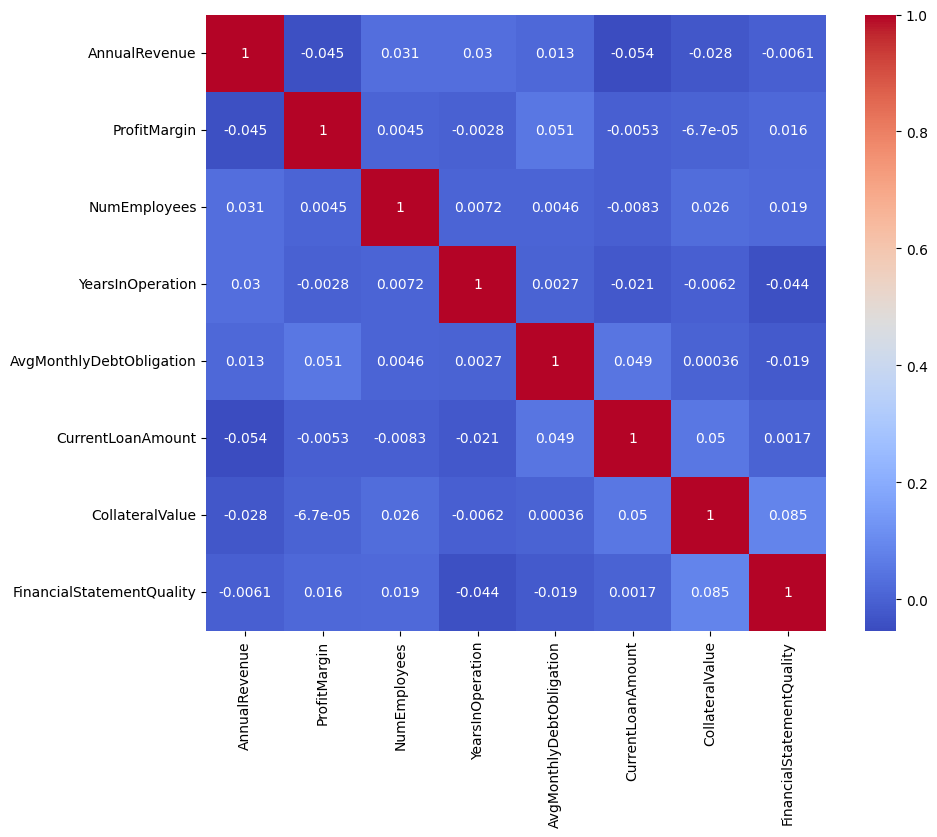

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for Multicollinearity among continuous variables using correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(x_train[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
# One-hot encode categorical variables automatically

x_train = pd.get_dummies(x_train, drop_first=True)
x_train.head()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech,Region_North,Region_South,Region_West
541,-0.397736,1.670674,1.840821,-1.023148,0,0.273995,0.059902,-0.339184,-1.410922,False,True,False,False,False,True,False
440,-0.116939,0.562434,-1.293011,-1.445396,1,-0.051594,0.336693,-0.438232,0.669792,False,False,False,False,True,False,False
482,-0.427782,1.625432,1.840821,1.580716,0,0.802390,-1.291695,-0.890774,1.363363,False,False,False,False,False,False,False
422,-0.285801,-0.464353,-0.580776,-0.460150,0,-1.378131,0.536156,-1.406022,0.669792,False,False,False,True,False,False,False
778,-0.249347,-0.528636,-1.150564,1.439967,0,1.337635,-0.681180,-0.933042,-1.410922,False,False,False,False,False,False,False


In [17]:
# One-hot encode categorical variables automatically
x_test = pd.get_dummies(x_test, drop_first=True)
x_test.head()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech,Region_North,Region_South,Region_West
521,-0.054767,0.481733,0.273905,-0.530525,0,0.159329,0.381931,0.541593,-1.410922,False,False,False,True,True,False,False
737,0.178150,-1.166486,1.128587,0.243597,0,0.608500,-0.793778,-1.812555,-0.717351,True,False,False,False,False,True,False
740,-0.438061,-0.204115,0.701246,1.299217,0,0.284620,0.065487,1.192821,1.363363,True,False,False,False,False,True,False
660,-0.338804,1.216001,-0.723223,-1.445396,0,0.741107,-0.077463,-0.917989,-0.023780,False,False,False,True,False,True,False
411,-0.397334,0.455891,0.558799,1.299217,0,-0.462707,0.556623,0.541099,-0.717351,False,False,False,True,False,False,True


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling:<font/>
Train models such as Ridge, LASSO, Elastic Net, and Random Forest for this regression problem.
Perform K-fold Cross Validation (depending on the data size and the capacity of your machine, you may choose 5 or 10)
Choose the best model setup after hyperparameter tuning and upon comparison of its CV score. Check for overfitting comparing this to the Train score.
Check out the performance of the best model using the Test Score.

# <font face = 'Palatino Linotype' color = '#5885AF'>Modelling: Ridge Regression<font/>


In [18]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

# Define Ridge regression model
ridge = Ridge()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform cross-validation grid search
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best model
best_model = grid_search.best_estimator_

# CV RMSE
cv_rmse = -grid_search.best_score_
print("Mean 5-fold CV RMSE:", np.round(cv_rmse, 2))

# Train Set RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error on train set:", np.round(rmse_train, 2))

# Test Set RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test set:", np.round(rmse_test, 2))


Best hyperparameters: {'alpha': 10.0, 'solver': 'saga'}
Mean 5-fold CV RMSE: 24.49
Root Mean Squared Error on train set: 22.35
Root Mean Squared Error on test set: 23.24


# <font face = 'Palatino Linotype' color = '#5885AF'>Modelling: LASSO Regression<font/>


In [19]:
from sklearn.linear_model import Lasso
import warnings

warnings.filterwarnings("ignore")

lasso = Lasso()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

cv_rmse = -grid_search.best_score_
print("Mean 5-fold CV RMSE:", np.round(cv_rmse, 2))

# Train RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error on train set:", np.round(rmse_train, 2))

# Test RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test set:", np.round(rmse_test, 2))


Best hyperparameters: {'alpha': 1.0}
Mean 5-fold CV RMSE: 24.24
Root Mean Squared Error on train set: 22.6
Root Mean Squared Error on test set: 23.14


# <font face = 'Palatino Linotype' color = '#5885AF'>Modelling: Elastic Net Regression<font/>


In [20]:
from sklearn.linear_model import ElasticNet

parametersGrid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": np.arange(0.1, 0.9, 0.1)
}

eNet = ElasticNet()

grid_search = GridSearchCV(
    eNet,
    parametersGrid,
    scoring='neg_root_mean_squared_error',
    cv=5
)

grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

cv_rmse = -grid_search.best_score_
print("Mean 5-fold CV RMSE:", np.round(cv_rmse, 2))

# Train RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error on train set:", np.round(rmse_train, 2))

# Test RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test set:", np.round(rmse_test, 2))


Best hyperparameters: {'alpha': 1, 'l1_ratio': np.float64(0.7000000000000001)}
Mean 5-fold CV RMSE: 23.71
Root Mean Squared Error on train set: 22.95
Root Mean Squared Error on test set: 23.68


# <font face = 'Palatino Linotype' color = '#5885AF'>Modelling: Random Forest Regressor<font/>


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

cv_rmse = -grid_search.best_score_
print("Mean 5-fold CV RMSE:", np.round(cv_rmse, 2))

# Train RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error on train set:", np.round(rmse_train, 2))

# Test RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test set:", np.round(rmse_test, 2))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean 5-fold CV RMSE: 6.66
Root Mean Squared Error on train set: 2.62
Root Mean Squared Error on test set: 6.3


# <font face = 'Palatino Linotype' color = '#5885AF'> Saving the Model for Future Deployment<font/>

In [22]:
# Save a copy of the Random Forest Credit Risk Model
import pickle
pickle.dump(best_model, open('RFCreditRiskModel.pkl', 'wb'))
print("Random Forest model saved successfully as RFCreditRiskModel.pkl")


Random Forest model saved successfully as RFCreditRiskModel.pkl
